# Coffee and Coding Python Hackathon: Introduction to Pandas DataFrames

In this session we will be focusing on working with Pandas DataFrames. 

Pandas DataFrames are an efficient and fast way of managing and exploring data. Therefore, getting to know Pandas functionality and how to manipulate, analyse, wrangle and even produce graphs is important.  

There are ______three______ exercises of varying difficulty that you should try and attempt as a group. 

___________________________________________________________________________

**You don’t need to complete each exercise – the important thing is to try! A big part of learning to code and refining your skills is practice through trial and error.**
___________________________________________________________________________

You can search for some of the answers to these exercises on Google but that doesn’t mean you should.

Use Google to understand how things work, not how to solve the entire problem. You will get the most out of these exercises practicing in your small teams, sharing knowledge, and figuring them out together.

Our answers will be given and shared at the end of the session. It will great to see yours as well (no pressure and only if you feel comfortable). **You may even have a better solution!!**

If you want to share your code with the group you can:

+ Share it on our main Teams chat when we go through each exercise. See Appendix 1 for instructions on how to copy code into Teams using the Code Snippet tool.

+ If you would prefer to share anonymously – please email us your solution at coffee.coding@ons.gov.uk




# Challenge Round 1 - Data Loading and Combining 

Before you can do anything to data you usually need to get it into a data structure so you can work with it. One really common type of data structure is Pandas, and for this all you need to do is load the data into a Pandas DataFrame. Sounds simple but not always... in this round have a go and see if you can load in dummydata_dpts.csv and dummydata_surveys.csv files into pandas dataframes and then combine both datasets into 1 dataframe. 

Use the space below to complete the following:

1) Import pandas

2) Use pandas to read in the data, making sure you assign them to a variable (be mindful of what **directory** you are currently in and where your downloaded datasets exist)

3) Combine the two datasets together (Check out how the join went - is there anything that needs to change before you join them?) 

Hint 1: If you are getting a **FileNotFoundError** click here for a suggestion. 


Hint 2: Not sure how to combine datasets together, check out this on ways to combine dataframes. 

In [23]:
#Import modules
import pandas as pd 
import os

# Sanity check I am in the correct directory 
print('My current directory is ' + os.getcwd())
# If I am not in the correct directory change it
#os.chdir("directory")

with open('dummydata_dpts.csv') as dt1, open('dummydata_surveys.csv') as dt2: 
    # open the datasets
    data1 = pd.read_csv(dt1)
    data2 = pd.read_csv(dt2)

    # rename column in data2 so the dataframes merge together nicely
    data2 = data2.rename(columns={'age':'Age'})

    # combine the dataframes together using the append method
    data = data1.append(data2, ignore_index=True)




My current directory is d:\Coffee and Coding Exercise Session\Session 2


# Challenge Round 2 - Exploring the Data

So you now have your data all in one dataframe! Great. What next? Well by far the longest and probably most important process to any project involving data is the process of **exploring** it. In this round you will need to explore the data to answer the questions below and make some decisions on how to deal with some of what your exploration uncovers. There are no right or wrong ways of going about exploring your data, but there are a few nice methods that are in built into pandas that make inspecting the data a lot easier. 

Use the space below to complete the following:
1) Inspect the ages of the employees across the departments. Anything perculiar about the ages? Work out how to remove anything you find strange. 
2) How many employees are there from each department?    
3) How many lines of code per week (use column NumLinesCode_Pw) do the 'Health Population and Methods Transformation' department code? 
4) How many coffees per week (use column NumCoffee_Pw) do the the 'Methodology and Quality' department consume? 
5) Which department writes the most amount of code per week per employee? 



In [24]:
# To inspect the Age column 
data['Age'].describe()
# Inspect all the numerical based columns in the data use: data.describe()

# from the min and max here we can see that there is someone listed as 5 and 167 years of age. This is probably a typo and will need to be dealt with. 
# One way of dealing with them (and probably the best way) is to just remove them entirely from the dataset.  

count    300.000000
mean      40.820000
std       13.977081
min        5.000000
25%       33.000000
50%       41.000000
75%       49.000000
max      167.000000
Name: Age, dtype: float64

In [26]:
# Removing the 5 and 167 y/o from the dataset. 

# Get the min and max within the column 
min_Age = min(data['Age'])
max_Age = max(data['Age'])

data = data.loc[(data.Age != min_Age) & (data.Age != max_Age)]

In [27]:
# Sense check the Age variable 
data['Age'].describe()

count    298.000000
mean      40.516779
std       11.775169
min       18.000000
25%       33.000000
50%       41.000000
75%       49.000000
max       71.000000
Name: Age, dtype: float64

In [33]:
# How many employees are there in each department
employees_by_dpt = data.value_counts('Department')
print(employees_by_dpt)

Department
Data Science Campus                             70
Methodology and Quality                         57
People and Business Services                    51
Health Population and Methods Transformation    43
Data Growth and Operations                      27
Economic Statistics Change                      20
Macroeconomic Statistics and Analysis           20
Surveys                                         10
dtype: int64


In [37]:
type(employees_by_dpt)

pandas.core.series.Series

In [54]:
# How many lines of code do the Health Population and Methods Transformation code per week? 

HPMT_numlinescode_pw = sum(data.loc[(data.Department == 'Health Population and Methods Transformation')]['NumLinesCode_Pw'])
print('Health Population and Methods Transformation department codes ' + str(HPMT_numlinescode_pw) + ' lines of code per week')

Health Population and Methods Transformation department codes 34509 lines of code per week


In [31]:
# How many coffees do the Methodology and Quality department drink per week? 
MQ_coffeeintake_pw = sum(data.loc[(data.Department == 'Methodology and Quality')]['NumCoffee_Pw'])
print('Methodology and Quality department drinks ' + str(MQ_coffeeintake_pw) + ' cups of coffee per week')

Methodology and Quality department drinks 307.9000000000001 coffee per week


In [44]:
# Which department writes the most amount of code per week per employee:

# empty dictionary to collate information
code_pw_perEmp = {}

for dpt in employees_by_dpt.keys():

    code_pw_perEmp[dpt] = sum(data.loc[(data.Department == dpt)]['NumLinesCode_Pw'])/employees_by_dpt[dpt]

code_pw_perEmp
 

# Challenge Round 3 - Visualising the data 

Now that you have a good sense of the data another great thing to do is start visualise it. This can be a really useful way of seeing trends in your data.

Your challenge for this round is to use pandas functionality to produce the following graph:
1) A box plot that shows the amount of coffee drank per week by department 

Make sure you try and improve the graph as much as possible by checking out the functional arguments of the boxplot() method. 

What can and cant you do with this method compared to using more conventional methods like matplotlib? 


c:\Users\scottc1\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


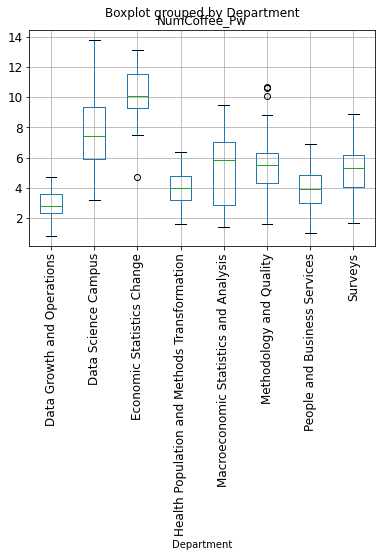

In [59]:
data.boxplot(column='NumCoffee_Pw', by='Department', rot= 90, fontsize=12)